## Question 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

### Answer --
1. We are given two matrics, first has 'n' rows and 'k' columns, second has 'k' rows and 'm' columns.
2. In matrix multiplication, we multiply each row of first matrix to each column of second matric. Each row of first matrix has 'k' numbers and each column of second matrix also have 'k' numbers.
3. We multiply corresponding 'k' numbers of first matrix with second matrix and effectively get 'k' multiplications.
4. Lets consider a+b as 1 addition operation, so a+b+c as 2 addition operations, in our case we have (k - 1) additions.
5. We multiply each row with each column, effectively 'n * m' vector multiplications.
6. Total multiplications we will get is 'n * m * k' and total additions we will get are 'n * m * (k - 1)'.

## Question 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [1]:
import time

In [2]:
n =20
k =30
m =40

nk_matrix = [[1]*k]*n
km_matrix = [[1]*m]*k

# recording the start time
start = time.time()

# lets first change the shape of km_matrix, so that it can be easily multiplied with nk_matrix.
new_km_matrix = []
for i in range(m):
    row = []
    for j in range(k):
        row.append(km_matrix[j][i])
    new_km_matrix.append(row)

# print(len(new_km_matrix))

multiplied_matrix = []
for i in range(n):
    row = []
    for j in range(m):
        multiplication = 0
        for l in range(k):
            multiplication += nk_matrix[i][l]*new_km_matrix[j][l]
        row.append(multiplication)
    multiplied_matrix.append(row)

# print(multiplied_matrix)
# print(len(multiplied_matrix))

# recording the end time
end = time.time()
print(end - start)

0.022699356079101562


In [3]:
import numpy as np

nk_matrix = np.array(nk_matrix)
km_matrix = np.array(km_matrix)

start = time.time()
multiplied_matrix = np.dot(nk_matrix,km_matrix)

# print(multiplied_matrix)
end = time.time()
print(end - start)

0.00016069412231445312


Numpy arrays are faster than Python lists. Here are some reasons:
1. Numpy operations are implemented in C, which are low level operations and hence faster. Python loops are slower due to interpreting nature of Python.
2. Lists are more complex data types than primitive arrays. Lists provide more functionalities than Numpy arrays but this efficiency slows down the operations performed on them.

## Question 4. What is the gradient of the following function with respect to x and y? $x^2y + y^3\sin(x)$


### Answer --

1. Given function is $x^2y + y^3sin(x)$.
2. Partially derivate it wrt $x$. which gives us $2xy + y^3cos(x)$.
3. Partially derivate it wrt $y$. which gives us $x^2 + 3y^2sin(x)$.
4. Gradient vector of the given function will be $(2xy + y^3cos(x),x^2 + 3y^2sin(x))$

## Question 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
!pip install jax

In [5]:
from jax import grad
import jax.numpy as jnp

def f(x, y):
  return (x**2)*y + (y**3) * jnp.sin(x)

grad_f = grad(f, argnums=(0, 1))
print(grad_f(3.0, 2.0))

(Array(4.08006, dtype=float32, weak_type=True), Array(10.6934395, dtype=float32, weak_type=True))


In [6]:
print(grad_f(20.0, 24.0))

(Array(6601.3267, dtype=float32, weak_type=True), Array(1977.5695, dtype=float32, weak_type=True))


After putting same values in analytical solution and getting answers from scientific calculator both the answers match, it is required that angle is provided in radians.

## Question 6. Use sympy to confirm that you obtain the same gradient analytically.

In [7]:
!pip install sympy

In [8]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y')

f = (x**2)*y + (y**3) * sp.sin(x)
print(sp.diff(f, x))
print(sp.diff(f, y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


Using sympy we are also getting same answer which we got in analytical method.

## Question 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.


In [9]:
dictionary = {2022 :
 {'Branch_1' :
  {'Roll No': 1,
   'Name': 'N',
   'Marks':
    {'English': 70, 'Maths': 100,}
   }
  },
2023 : {'Branch_1' : {}, 'Branch_2' : {}},
2024 :{'Branch_1' : {}, 'Branch_2' : {}},
2025 :{'Branch_1' : {}, 'Branch_2' : {}},
}


print(dictionary)

{2022: {'Branch_1': {'Roll No': 1, 'Name': 'N', 'Marks': {'English': 70, 'Maths': 100}}}, 2023: {'Branch_1': {}, 'Branch_2': {}}, 2024: {'Branch_1': {}, 'Branch_2': {}}, 2025: {'Branch_1': {}, 'Branch_2': {}}}


## Question 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [10]:
class Student:
    def __init__(self, roll_no: int, name: str, sub_marks: dict):
        self.roll_no = roll_no
        self.name = name
        self.sub_marks = sub_marks

    def change_name(name):
        self.name = name

    def change_marks(sub_marks):
        self.sub_marks = sub_marks

    def change_roll_no(roll_no):
        self.roll_no = roll_no

    def __str__(self):
        return f'{self.roll_no} {self.name} {self.sub_marks}'

In [11]:
class Branch:
    def __init__(self, branch: str, students: list[Student]):
        self.branch = branch
        self.students = students

In [12]:
class Year:
    def __init__(self, year: int, branch: list[Branch]):
        self.year = year
        self.branch = branch

In [13]:
samarth = Student(1, 'Samarth', {'English': 70, 'Maths': 100})
cse = Branch('cse', [samarth])
year_2022 = Year(2022, [cse])

print(year_2022.year)
print(year_2022.branch[0].branch)
print(year_2022.branch[0].students[0].roll_no)
print(year_2022.branch[0].students[0].name)
print(year_2022.branch[0].students[0].sub_marks)

2022
cse
1
Samarth
{'English': 70, 'Maths': 100}


This same type of data could be stored, making different classes for students, branch, and years with respective properties.

## Question 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



In [14]:
x_vals = np.arange(0.5, 101, 0.5)
# print(x_vals)

### $y = x$

In [15]:
import matplotlib.pyplot as plt

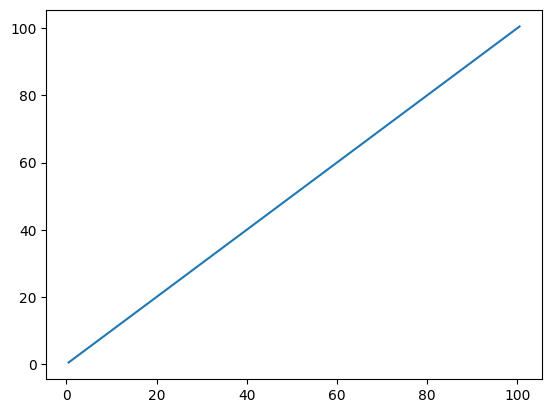

In [16]:
y_vals = x_vals

plt.plot(x_vals, y_vals)
plt.show()

### $y=x^2$

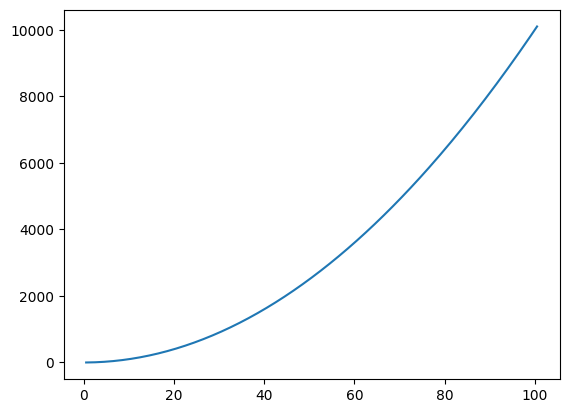

In [17]:
y_vals = x_vals**2

plt.plot(x_vals, y_vals)
plt.show()

### $y=x^3/100$

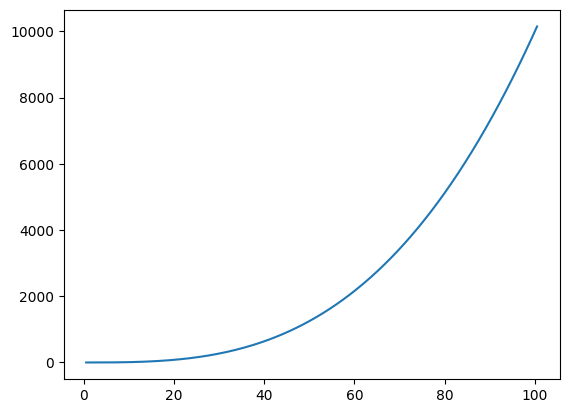

In [18]:
y_vals = x_vals**3
y_vals = y_vals/100

plt.plot(x_vals, y_vals)
plt.show()

### $y=sin(x)$

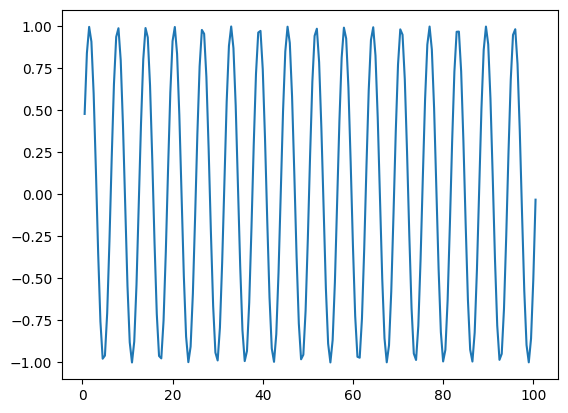

In [19]:
y_vals = np.sin(x_vals)

plt.plot(x_vals, y_vals)
plt.show()

### $y=sin(x)/x$

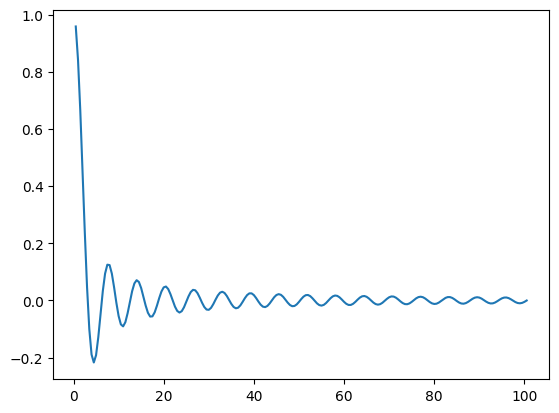

In [20]:
y_vals = np.sin(x_vals)/x_vals

plt.plot(x_vals, y_vals)
plt.show()

### $y=log(x)$

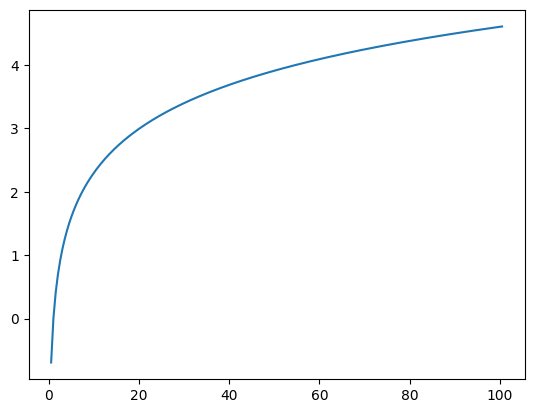

In [21]:
y_vals = np.log(x_vals)

plt.plot(x_vals, y_vals)
plt.show()

### $y=e^x$

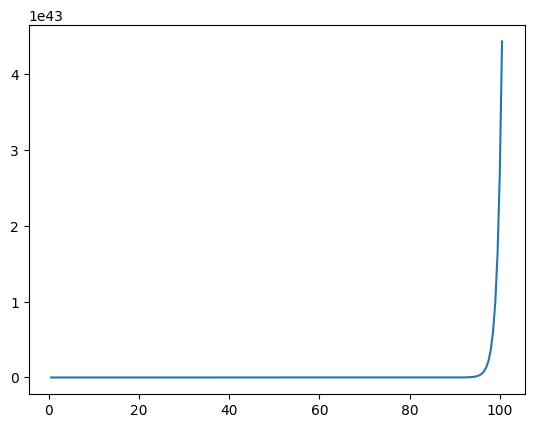

In [22]:
y_vals = np.exp(x_vals)
# plt.figure(figsize=(10, 20))
plt.plot(x_vals, y_vals)
plt.show()

This graph is looking straight line intially because of the large values towards end. Below are the actual values shown

In [23]:
print(y_vals)

[1.64872127e+00 2.71828183e+00 4.48168907e+00 7.38905610e+00
 1.21824940e+01 2.00855369e+01 3.31154520e+01 5.45981500e+01
 9.00171313e+01 1.48413159e+02 2.44691932e+02 4.03428793e+02
 6.65141633e+02 1.09663316e+03 1.80804241e+03 2.98095799e+03
 4.91476884e+03 8.10308393e+03 1.33597268e+04 2.20264658e+04
 3.63155027e+04 5.98741417e+04 9.87157710e+04 1.62754791e+05
 2.68337287e+05 4.42413392e+05 7.29416370e+05 1.20260428e+06
 1.98275926e+06 3.26901737e+06 5.38969848e+06 8.88611052e+06
 1.46507194e+07 2.41549528e+07 3.98247844e+07 6.56599691e+07
 1.08254988e+08 1.78482301e+08 2.94267566e+08 4.85165195e+08
 7.99902177e+08 1.31881573e+09 2.17435955e+09 3.58491285e+09
 5.91052206e+09 9.74480345e+09 1.60664647e+10 2.64891221e+10
 4.36731791e+10 7.20048993e+10 1.18716009e+11 1.95729609e+11
 3.22703570e+11 5.32048241e+11 8.77199251e+11 1.44625706e+12
 2.38447478e+12 3.93133430e+12 6.48167448e+12 1.06864746e+13
 1.76190180e+13 2.90488497e+13 4.78934563e+13 7.89629602e+13
 1.30187912e+14 2.146435

## Question 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [24]:
arr = np.random.rand(20, 5) #we are getting values form 0 to 1

arr = arr + 1 #adding 1 will make the values from 1 to 2

print(arr)

[[1.60256608 1.94501595 1.46289608 1.61153937 1.09798757]
 [1.04460269 1.21445588 1.13971933 1.77054029 1.16545236]
 [1.49204786 1.97098257 1.03363752 1.04821485 1.73402518]
 [1.57378156 1.8697364  1.79583316 1.94179635 1.24668274]
 [1.7586857  1.91304177 1.75625353 1.08944077 1.8616904 ]
 [1.58728522 1.25499438 1.72735019 1.62818055 1.49663126]
 [1.09686523 1.66760466 1.88900431 1.39784733 1.43893214]
 [1.24212225 1.21382549 1.17124058 1.71927412 1.7109157 ]
 [1.58592994 1.50004272 1.62534651 1.40098937 1.13944471]
 [1.88067434 1.3413322  1.1351351  1.20997692 1.51423698]
 [1.63786068 1.47311559 1.60241795 1.17667864 1.29930201]
 [1.60113136 1.80634636 1.94786976 1.87129116 1.23647778]
 [1.60188844 1.27490583 1.12863321 1.19386124 1.69263829]
 [1.36149794 1.40176115 1.8474405  1.39207847 1.22571174]
 [1.20739891 1.8345793  1.09765723 1.97846017 1.32185767]
 [1.5849723  1.39091055 1.1037838  1.02236636 1.81709755]
 [1.45963769 1.41560168 1.29168874 1.05030549 1.91244241]
 [1.8360595  1

In [25]:
import pandas as pd

In [26]:
arr_df = pd.DataFrame(arr)
arr_df.columns = ['a', 'b', 'c', 'd', 'e']

arr_df

,a,b,c,d,e
0,1.602566,1.945016,1.462896,1.611539,1.097988
1,1.044603,1.214456,1.139719,1.770540,1.165452
2,1.492048,1.970983,1.033638,1.048215,1.734025
3,1.573782,1.869736,1.795833,1.941796,1.246683
4,1.758686,1.913042,1.756254,1.089441,1.861690
5,1.587285,1.254994,1.727350,1.628181,1.496631
6,1.096865,1.667605,1.889004,1.397847,1.438932
7,1.242122,1.213825,1.171241,1.719274,1.710916
8,1.585930,1.500043,1.625347,1.400989,1.139445
9,1.880674,1.341332,1.135135,1.209977,1.514237


In [27]:
std_dev = arr_df.std()
max_std_dev = max(std_dev)
row = np.where(std_dev == max_std_dev)

arr_df.columns[row[0]]

Index(['c'], dtype='object')

In [28]:
std_dev

a    0.249419
b    0.285089
c    0.335235
d    0.322900
e    0.267011
dtype: float64

In [29]:
means = arr_df.mean(axis=1)
max_mean = max(means)
row = np.where(means == max_mean)

arr_df.index[row[0]]

Index([11], dtype='int64')

In [30]:
means

0     1.544001
1     1.266954
2     1.455782
3     1.685566
4     1.675822
5     1.538888
6     1.498051
7     1.411476
8     1.450351
9     1.416271
10    1.437875
11    1.692623
12    1.378385
13    1.445698
14    1.487991
15    1.383826
16    1.425935
17    1.581380
18    1.478796
19    1.603613
dtype: float64

## Question 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [31]:
arr_df['f'] = arr_df['a'] + arr_df['b'] + arr_df['c'] + arr_df['d'] + arr_df['e']

arr_df

,a,b,c,d,e,f
0,1.602566,1.945016,1.462896,1.611539,1.097988,7.720005
1,1.044603,1.214456,1.139719,1.770540,1.165452,6.334771
2,1.492048,1.970983,1.033638,1.048215,1.734025,7.278908
3,1.573782,1.869736,1.795833,1.941796,1.246683,8.427830
4,1.758686,1.913042,1.756254,1.089441,1.861690,8.379112
5,1.587285,1.254994,1.727350,1.628181,1.496631,7.694442
6,1.096865,1.667605,1.889004,1.397847,1.438932,7.490254
7,1.242122,1.213825,1.171241,1.719274,1.710916,7.057378
8,1.585930,1.500043,1.625347,1.400989,1.139445,7.251753
9,1.880674,1.341332,1.135135,1.209977,1.514237,7.081356


In [32]:
arr_df['g'] = arr_df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

In [33]:
rows_less_than_8 = arr_df[arr_df['g'] == 'LT8']

rows_less_than_8.shape[0]

16

In [34]:
std_dev_lt8 = arr_df[arr_df['g'] == 'LT8']['f'].std()
std_dev_gt8 = arr_df[arr_df['g'] == 'GT8']['f'].std()

std_dev_lt8, std_dev_gt8

(0.37637016247218785, 0.20555051407632863)

## Question 12. Write a small piece of code to explain broadcasting in numpy.

In [35]:
a = np.array([1,2,3])
b = np.array([[2,4,6], [7,8,9]])

print(a + b)

[[ 3  6  9]
 [ 8 10 12]]


1. The array a is [1, 2, 3] with shape (3,).
2. The array b is [[2, 4, 6], [7, 8, 9]] with shape (2, 3).
3. During the addition, a is broadcast to match the shape of b. This means that a is effectively treated as if it were [[1, 2, 3], [1, 2, 3]].


## Question 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [36]:
def my_argmin(arr):
    min_index = 0
    min_value = arr[0]

    for i in range(1, arr.size):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

In [39]:
arr = np.array([3, 4, 1, 5, 9, 2, 6, 5, 3, 5, 9, 10, 2, 3, 4, 6, 7, 8, 9])

my_argmin(arr), np.argmin(arr)

(2, 2)

In [42]:
arr = np.array([3, 4, 10, 5, 9, 2, 6, 5, 3, 5, 9, 10, 2, 3, -13, 6, 7, 8, 9])

my_argmin(arr), np.argmin(arr)

(14, 14)